# Objective :- This is a usecase where we need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
agri_df=pd.read_csv('Agriculture.csv')

In [3]:
agri_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
agri_df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


# Attribute Information

ID : UniqueID
    
Estimated_Insects_Count : Estimated insects count per square meter
    
Crop_Type : Category of Crop(0,1)
    
Soil_Type : Category of Soil(0,1)
    
Pesticide_Use_Category : Type of pesticides uses(1-Never, 2-Previously Used, 3-Currently Using)
    
Number_Doses_week : Number of doses per week
    
Number_weeks_Used : Number of weeks used
    
Number_Weeks_Quit : Number of weeks Quit
    
Season : Season Category(1,2,3)
    
Crop_damage : Crop damage Category(0=aive,1=Damage due to other causes,2=damage due to pesticides)

In [5]:
#finding the numbvers of rows and columns in the dataset
agri_df.shape

(88858, 10)

In [6]:
#finding the information about the dataset 
agri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


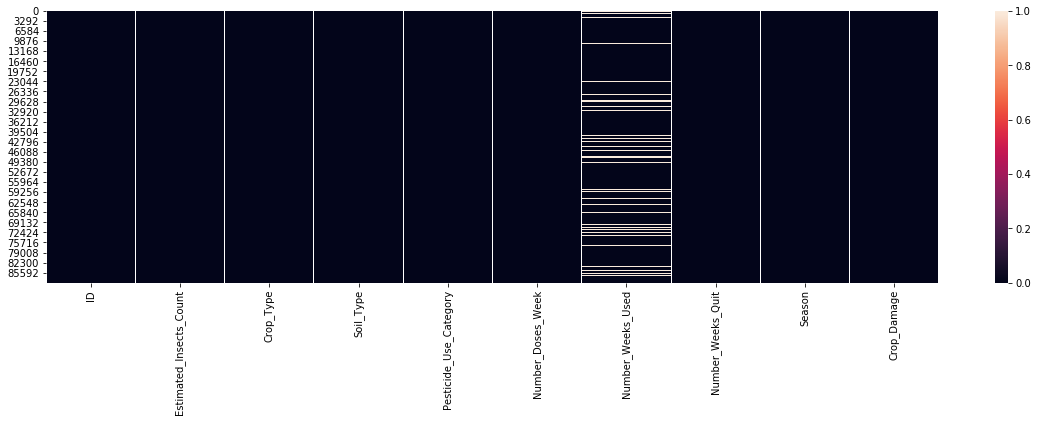

In [7]:
#Checking null values
plt.figure(figsize=(20,5))
sns.heatmap(agri_df.isnull())

In [8]:
agri_df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [9]:
#replacing nan values in Number_weeks_used with the mean of the column Number_weeks_used
week_used_mean=agri_df['Number_Weeks_Used'].mean()
print(week_used_mean)
agri_df['Number_Weeks_Used']=agri_df['Number_Weeks_Used'].fillna(week_used_mean)

28.62397004683313


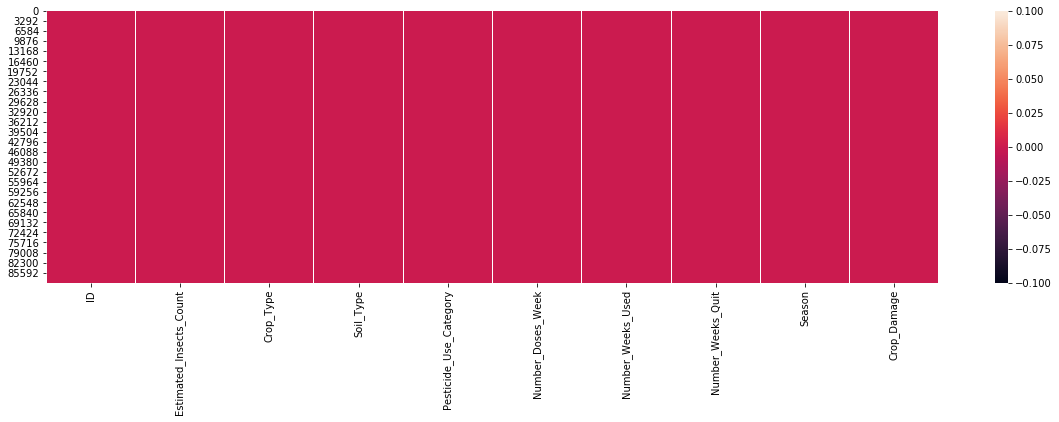

In [10]:
#ReChecking null values
plt.figure(figsize=(20,5))
sns.heatmap(agri_df.isnull())

In [11]:
agri_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Bivariate Analysis

Text(0.5, 1.0, 'Crop_Damage W.R.T Crop_Type')

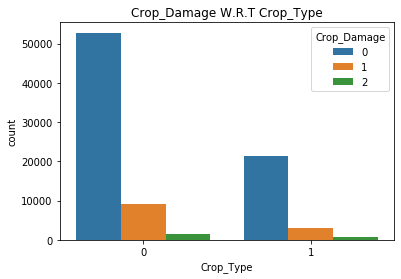

In [12]:
sns.countplot(agri_df['Crop_Type'],hue=agri_df['Crop_Damage'])
plt.title('Crop_Damage W.R.T Crop_Type')

Text(0.5, 1.0, 'Crop_Damage count')

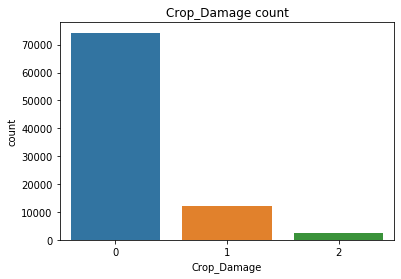

In [13]:
sns.countplot(agri_df['Crop_Damage'])
plt.title('Crop_Damage count')

Text(0.5, 1.0, 'Crop_Damage W.R.T Soil_Type')

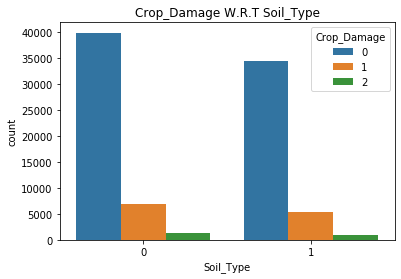

In [14]:
sns.countplot(agri_df['Soil_Type'],hue=agri_df['Crop_Damage'])
plt.title('Crop_Damage W.R.T Soil_Type')

Text(0.5, 1.0, 'Crop_Damage W.R.T Pesticide_Use_Category')

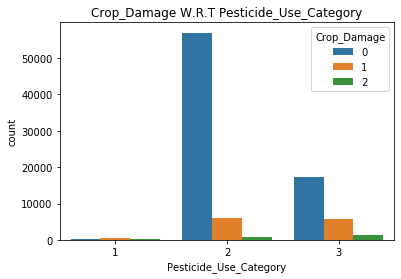

In [15]:
sns.countplot(agri_df['Pesticide_Use_Category'],hue=agri_df['Crop_Damage'])
plt.title('Crop_Damage W.R.T Pesticide_Use_Category')

Text(0.5, 1.0, 'Crop_Damage W.R.T Season')

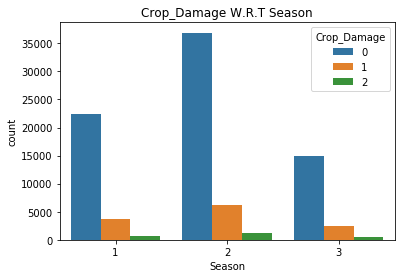

In [16]:
sns.countplot(agri_df['Season'],hue=agri_df['Crop_Damage'])
plt.title('Crop_Damage W.R.T Season')

Text(0.5, 1.0, 'Crop_Damage W.R.T Number_Doses_Week')

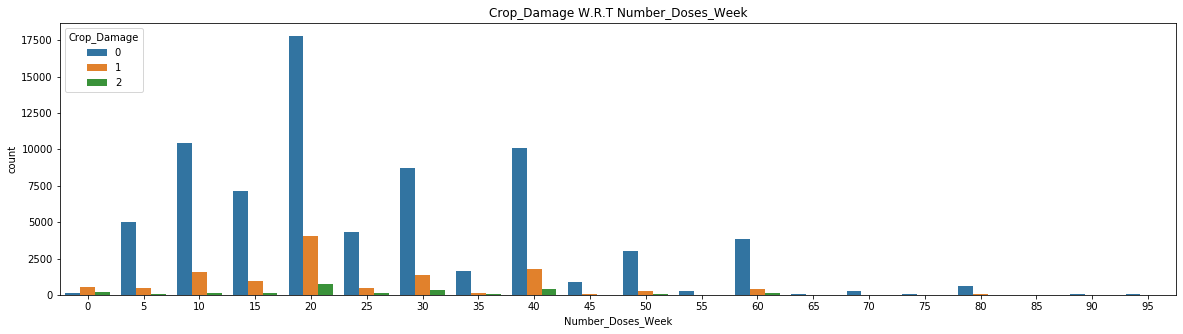

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(agri_df['Number_Doses_Week'],hue=agri_df['Crop_Damage'])
plt.title('Crop_Damage W.R.T Number_Doses_Week')

# univariate analysis

In [18]:
agri_df.columns
#using boxplot to see outliers and IQR range

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

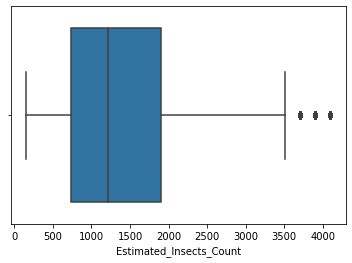

In [19]:
sns.boxplot(agri_df['Estimated_Insects_Count'])

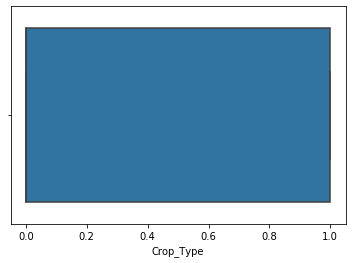

In [20]:
sns.boxplot(agri_df['Crop_Type'])

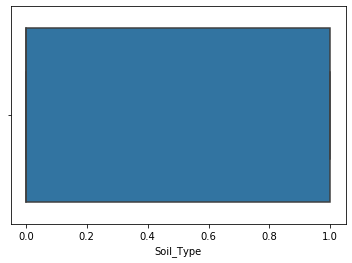

In [21]:
sns.boxplot(agri_df['Soil_Type'])

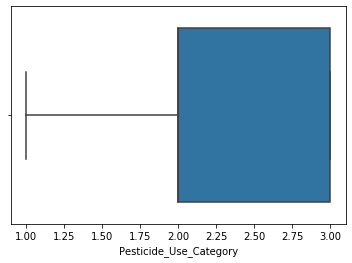

In [22]:
sns.boxplot(agri_df['Pesticide_Use_Category'])

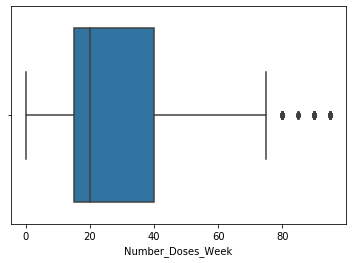

In [23]:
sns.boxplot(agri_df['Number_Doses_Week'])

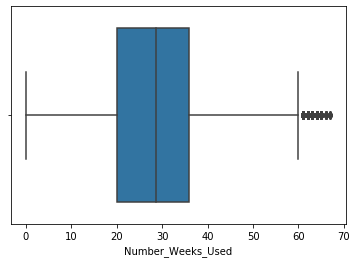

In [24]:
sns.boxplot(agri_df['Number_Weeks_Used'])

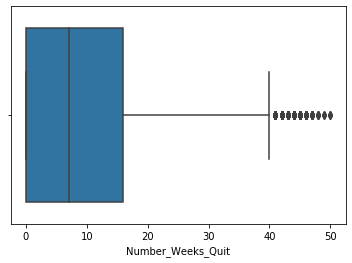

In [25]:
sns.boxplot(agri_df['Number_Weeks_Quit'])

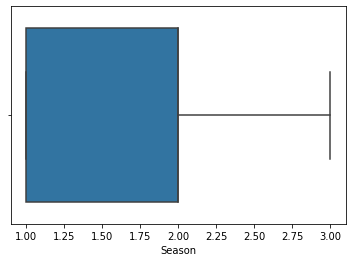

In [26]:
sns.boxplot(agri_df['Season'])

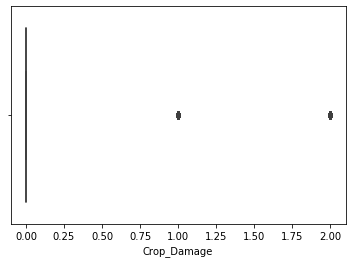

In [27]:
sns.boxplot(agri_df['Crop_Damage'])

In [28]:
#checking the distribution 
agri_df.columns


Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

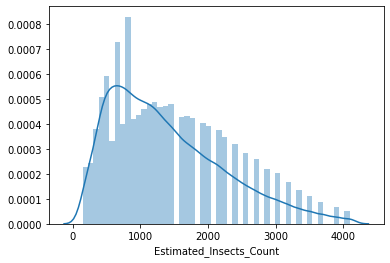

In [29]:
sns.distplot(agri_df['Estimated_Insects_Count'])

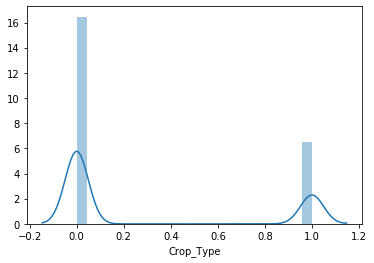

In [30]:
sns.distplot(agri_df['Crop_Type'])

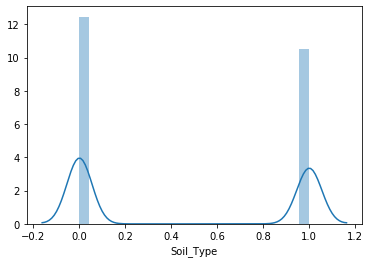

In [31]:
sns.distplot(agri_df['Soil_Type'])

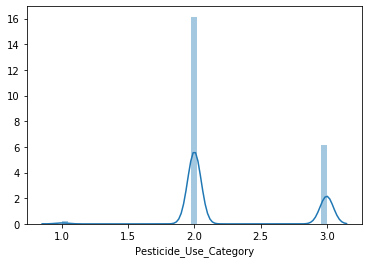

In [32]:
sns.distplot(agri_df['Pesticide_Use_Category'])

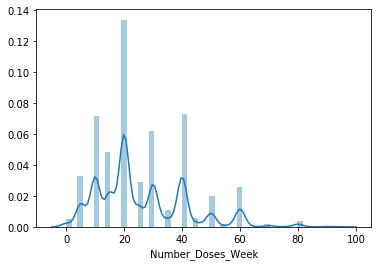

In [33]:
sns.distplot(agri_df['Number_Doses_Week'])

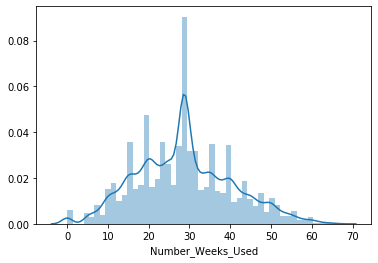

In [34]:
sns.distplot(agri_df['Number_Weeks_Used'])

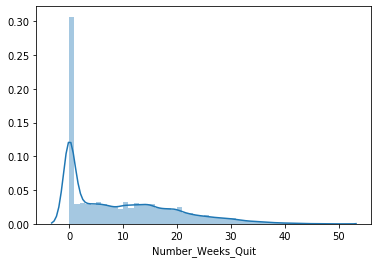

In [35]:
sns.distplot(agri_df['Number_Weeks_Quit'])

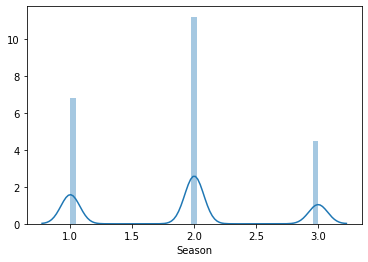

In [36]:
sns.distplot(agri_df['Season'])

# Statistical Analysis

In [37]:
agri_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


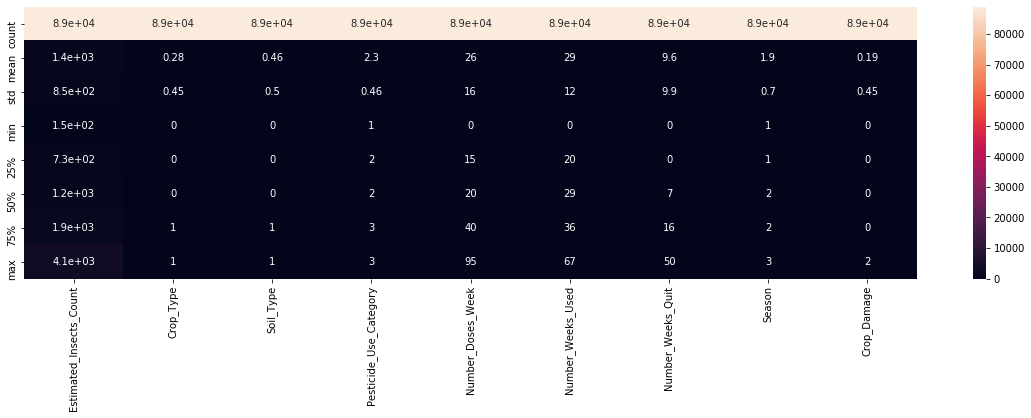

In [38]:
plt.figure(figsize=(20,5))
sns.heatmap(agri_df.describe(),annot=True)

In [39]:
agri_cor=agri_df.corr()

In [40]:
agri_cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


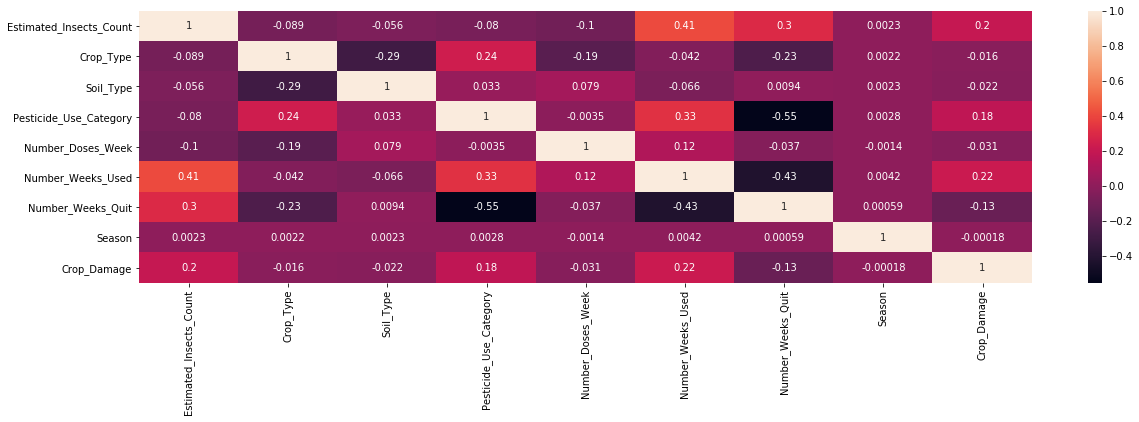

In [41]:
plt.figure(figsize=(20,5))
sns.heatmap(agri_cor,annot=True)

In [42]:
#checking the skewness
agri_df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [43]:
#dataset is positively skewed

In [44]:
#Dropping Id Column
agri_df.drop(['ID'],axis=1,inplace=True)

# Removing outliers and skewness from the dataset

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(agri_df))
print(z)

[[1.42632444 1.58634254 0.92002085 ... 0.96862918 1.27896183 0.41954474]
 [1.40159074 1.58634254 0.92002085 ... 0.96862918 0.14692448 1.78206788]
 [1.34505657 1.58634254 0.92002085 ... 0.96862918 0.14692448 1.78206788]
 ...
 [2.49337818 1.58634254 0.92002085 ... 0.16059534 0.14692448 0.41954474]
 [2.7124481  1.58634254 0.92002085 ... 0.84944697 1.57281078 0.41954474]
 [2.93976258 1.58634254 0.92002085 ... 0.26159957 1.57281078 0.41954474]]


In [46]:
threhold=3

In [47]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([    7,     9,    14, ..., 88741, 88770, 88853], dtype=int64), array([8, 8, 8, ..., 8, 4, 6], dtype=int64))


In [48]:
z[7][8]#checking the above output result 

3.9836805028066236

In [49]:
z[9][8]#checking the above output result

3.9836805028066236

In [50]:
agri_new=agri_df[(z<3).all(axis=1)]  #removing outliers

In [51]:
print("Shape of the dataset before removing outliers",agri_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",agri_new.shape)

Shape of the dataset before removing outliers (88858, 9)

 

Shape of the dataset after removing the outliers (84853, 9)


In [52]:
#we are left with 84853 rows after removing outliers

In [53]:
#checking skewness after removing outliers
agri_new.skew()

Estimated_Insects_Count    0.802312
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category     0.857490
Number_Doses_Week          0.745649
Number_Weeks_Used          0.262547
Number_Weeks_Quit          0.792407
Season                     0.145248
Crop_Damage                2.065124
dtype: float64

In [54]:
#removing the Skewness
collist=agri_new.columns.values
for i in range(0,len(collist)):
    if agri_new.skew().loc[collist[i]]>0.55:
        agri_new[collist[i]]=np.sqrt(agri_new[collist[i]])

In [55]:
agri_new.skew()

Estimated_Insects_Count    0.210446
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category     0.689847
Number_Doses_Week         -0.022322
Number_Weeks_Used          0.262547
Number_Weeks_Quit         -0.029751
Season                     0.145248
Crop_Damage                2.065124
dtype: float64

# Splitting the data into training and testing sets 

In [56]:
x=agri_df.iloc[:,:-1]

In [57]:
x.shape

(88858, 8)

In [58]:
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [59]:
y=agri_df.iloc[:,-1]

In [60]:
y.shape

(88858,)

In [61]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [62]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)

In [63]:
x=df_x
print(x)

[[-1.42632444  1.58634254 -0.92002085 ... -2.43660084 -0.96862918
  -1.27896183]
 [-1.40159074  1.58634254 -0.92002085 ... -2.43660084 -0.96862918
   0.14692448]
 [-1.34505657  1.58634254 -0.92002085 ... -2.43660084 -0.96862918
   0.14692448]
 ...
 [ 2.49337818  1.58634254 -0.92002085 ...  0.96837874 -0.16059534
   0.14692448]
 [ 2.7124481   1.58634254 -0.92002085 ... -0.3084886   0.84944697
   1.57281078]
 [ 2.93976258  1.58634254 -0.92002085 ...  0.71300527 -0.26159957
   1.57281078]]


In [64]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [65]:
# finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i   
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)

Accuracy SCORE is equal to : 0.8340048166737941 at random state 42
Accuracy SCORE is equal to : 0.8325643160998447 at random state 43
Accuracy SCORE is equal to : 0.8325418082783768 at random state 44
Accuracy SCORE is equal to : 0.831821557991402 at random state 45
Accuracy SCORE is equal to : 0.830133471381305 at random state 46
Accuracy SCORE is equal to : 0.833532152422967 at random state 47
Accuracy SCORE is equal to : 0.8321366674919535 at random state 48
Accuracy SCORE is equal to : 0.8314614328479146 at random state 49
Accuracy SCORE is equal to : 0.8330369803506719 at random state 50
Accuracy SCORE is equal to : 0.8326543473857165 at random state 51
Accuracy SCORE is equal to : 0.8339147853879223 at random state 52
Accuracy SCORE is equal to : 0.8337122149947107 at random state 53
Accuracy SCORE is equal to : 0.833509644601499 at random state 54
Accuracy SCORE is equal to : 0.8329244412433321 at random state 55
Accuracy SCORE is equal to : 0.8339372932093903 at random state 56

In [66]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=75)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(44429, 8) (44429, 8) (44429,) (44429,)


# Testing the Algorithms and finding the the best parameters using Grid Search cv

In [67]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [ ]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

In [68]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [69]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [71]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),KNeighborsClassifier(n_neighbors=10),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")

    



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.8360530284273785


CROSS_VAL_SCORE = 0.833318339433867




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


ACCURACY_SCORE = 0.7529541515676698


CROSS_VAL_SCORE = 0.7523014470417574




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
        

In [72]:
#Hence it is observed that KNN_classifier  is giving a good result, therefore finalizing it

In [73]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
acc_score=accuracy_score(y_test,prediction)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8400369128272075
The Cross Val Score = 0.8398793547126226


In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [80]:
gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

0.8443584145490558

In [82]:
gbcpred=gbc.predict(x_test)
acc_score=accuracy_score(gbcpred,y_test)
print("Accuracy Score =", acc_score)

Accuracy Score = 0.8466091966958518


In [83]:
from sklearn.externals import joblib
joblib.dump(gbc,"gbc_Agriculture.pkl")

['gbc_Agriculture.pkl']